# Lesson 2 of AI Division by Zayan

## Supervised vs Unsupervised

Supervised learning uses labeled datasets, whereas unsupervised learning uses unlabeled datasets.

![asdda](https://media.licdn.com/dms/image/C4E12AQGbAM-_eriLMw/article-cover_image-shrink_720_1280/0/1632916005843?e=2147483647&v=beta&t=tK9-0A3zL7uHv_CVIaRZKIiw7vqSsHXfKWg4O2_PS64)

## Classification vs regression

Classification refers to predicting discrete class labels (bounded)
- Classifying whether there is a dog or a cat in the image
- Classifying the kingdom of a living thing

Regression refers to predicting a continuous quantity (theoretically boundless)
- How much am I going to make this year based on the hours I have put in
- Predicting house prices based on the location

![test](https://cdn-images-1.medium.com/max/1600/1*xs6Jr4iAPvoqszF9JgDWOA.png)

Supervised learning uses labeled datasets, whereas unsupervised learning uses unlabeled datasets.## Review of linear regression (Regression)

## Traditional machine learning models

Why we need them?

## Recap on linear regression

Standard linear regression for fitting $y = ax + b$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

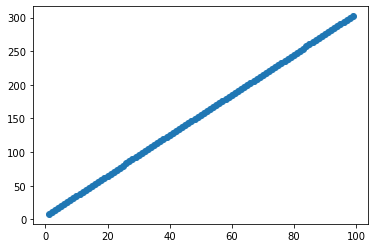

In [2]:
# Code Source: Karimi Zayan
# License: MIT license

# [1,2,3, ..., 99]
X = np.arange(1, 100) 
# transforms x
Y = 3 * X + 5
plt.scatter(X, Y)

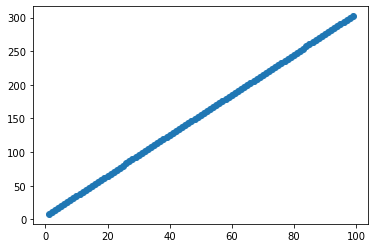

In [3]:
noise_scale_factor = 0
# Generates random noise between -0.5 and 0.5
noiseY = np.random.rand(X.shape[0]) - 0.5
Y = Y + noiseY * noise_scale_factor
plt.scatter(X,Y)

In [4]:
#Data Formatting for scikit learn
#[1,2,3, ...] -> [[1],[2],[3], ...]
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [5]:
# Running the linear regression algorithm on the data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
model.coef_, model.intercept_

(array([[3.]]), array([5.]))

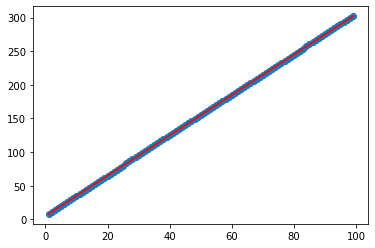

In [6]:
plt.scatter(X,Y)
plt.plot(np.arange(1, 100), model.coef_[0][0] * np.arange(1, 100) + model.intercept_[0], color = "red")

Linear Regression in action. Fits linear data.

### Optional Self study: Multiple linear regression

Instead of fitting $y = ax + b$,

you fit for multiple variables $y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$

Multiple coefficients and one intercept

### Optional Self study: Polynomial Regression and more

Instead of fitting linear equations, why not fit whatever

2nd-degree polynomial regression $y = a_1x^2 + a_2x + b$

Regress anything yee

## Logistic Regression (Classification)

It is regression but the curve you are regressing is a logistic curve and this can be used for binary classification

What exactly is a logistic curve?
Curve of function
$$y = \frac{1}{1 + e^{-(x-\mu)/s}}$$

![bruh](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)

![bruh2](https://miro.medium.com/max/1400/1*V6UtJDrpHiq9m1WnYnyo1Q.png)

Using logistic regression in scikit learn

Curve of function
$$y = \frac{1}{1 + e^{-(\beta _{0}+\beta _{1}x)}}$$

### Multivariate Logistic regression
$$y = \frac{1}{1 + e^{-(\beta _{0}+\beta _{1}x_1 + ... + \beta_nx_n)}}$$

### Optional reading: Multiclass Logistic regression
K-Class logistic regression

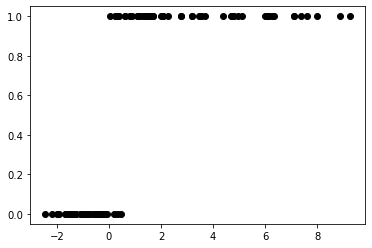

In [7]:
# Code source: Gael Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# and plot the result
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)

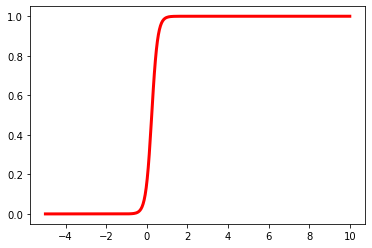

In [8]:
# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)


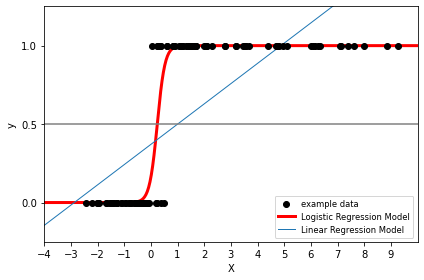

In [9]:
ols = LinearRegression()
ols.fit(X, y)

plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()

## Support Vector Machines (Classification and Regression)

Works by trying to find an N-dimensional hyperplane to split the data

![test3](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ZpkLQf2FNfzfH4HXeMw4MQ.png)

Maximising margin between 2 sets of data. Support vectors refers to the vectors that guide the margin

![test6](https://miro.medium.com/v2/resize:fit:828/format:webp/0*ecA4Ls8kBYSM5nza.jpg)

### But what if we dont have a line to fit our data?

![test3223](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/hyperplane.png)

Uses a kernel function $\phi$ to transform the lower dimension data to a higher dimension feature space

Most popularly used kernel is Radial Basis Function (RBF), very complex to explain, but think of it as a trainable transform that transforms the data from lower to higher dimensions to allow for a linear divide

SVM can have multiple classes, it will be made up of multiple hyperplanes meeting at a point

### Implimentation of SVM with different kernel functions on the iris dataset

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

Text(0, 0.5, 'Sepal width')

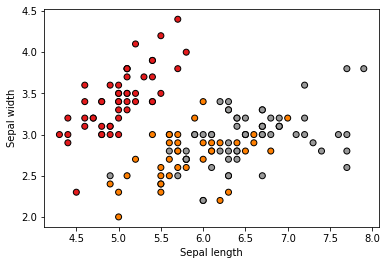

In [10]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

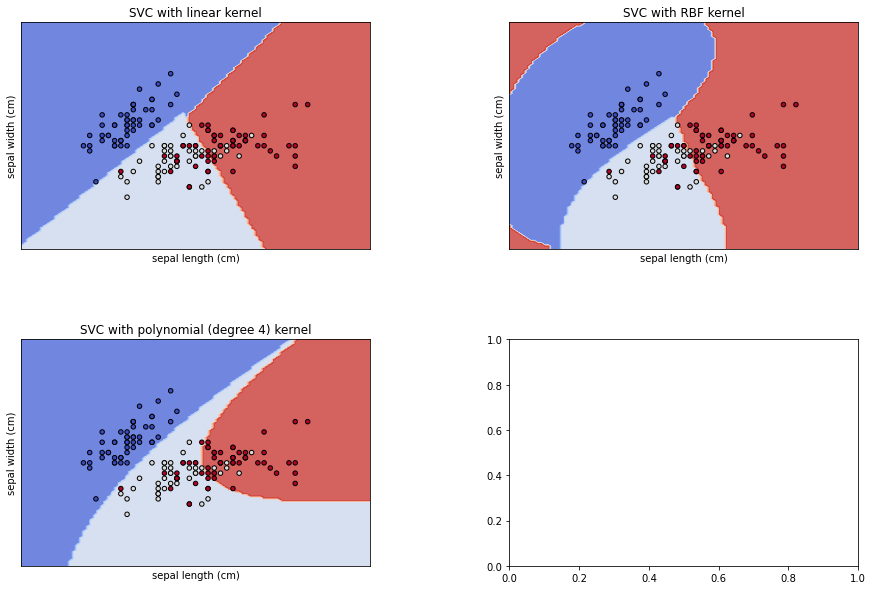

In [44]:
C = 1.0  # SVM regularization parameter
models = [
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
]


models= [clf.fit(X, y) for clf in models]

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 4) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
fig.set_size_inches(15, 10)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
"Linear Accuracy:", accuracy_score(y, models[0].predict(X))

('Linear Accuracy:', 0.82)

In [47]:
"RBF Accuracy:", accuracy_score(y, models[1].predict(X))

('RBF Accuracy:', 0.8266666666666667)

In [48]:
"3rd degree polynomial:", accuracy_score(y, models[2].predict(X))

('3rd degree polynomial:', 0.8133333333333334)

# Train-test split

Overfiting

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [82]:
model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=C)
model.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [83]:
accuracy_score(y_train, model.predict(X_train))

0.8

In [84]:
accuracy_score(y_test, model.predict(X_test))

0.8333333333333334

### Optional reading: SVM for regression

Instead of maximising the margin, we minimise it and allow for as many equally spaced support vectors (similar to linear regression)

## K-Nearest Neighbors (Classification or Regression)

The easiest machine learning algorithm

![rtwohvfs](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image)

Uniform method -> All neighbours are weighted equally

Distance method -> All neighbours are weighted based on how far they are form the new value

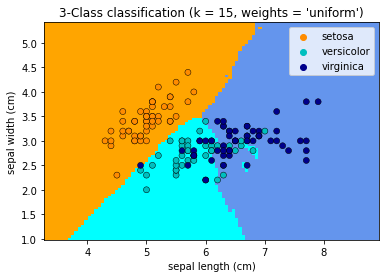

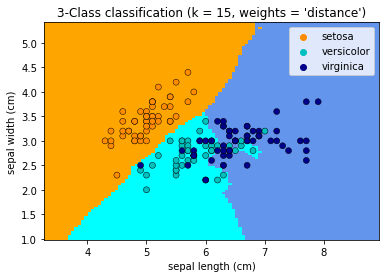

In [55]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors

k = 15

cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (k, weights)
    )

plt.show()

### Train test split

In [87]:
clf = neighbors.KNeighborsClassifier(k, weights="uniform")
clf.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8333333333333334

In [88]:
clf = neighbors.KNeighborsClassifier(k, weights="distance")
clf.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8333333333333334

### KNN Regressor

Looks at the average y value for it's x neighbours

![knnered](https://miro.medium.com/max/1400/1*1Fqej14RxTPp9zzQ5gKm_g.png)

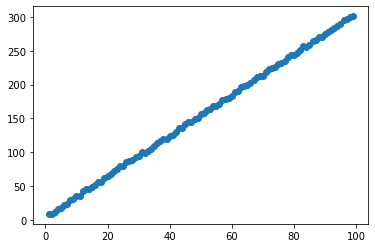

In [101]:
X = np.arange(1, 100) 
# transforms x
Y = 3 * X + 5
noise_scale_factor = 5
# Generates random noise between -0.5 and 0.5
noiseY = np.random.rand(X.shape[0]) - 0.5
Y = Y + noiseY * noise_scale_factor
plt.scatter(X,Y)

In [104]:
from sklearn.model_selection import train_test_split
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

In [109]:
clf = neighbors.KNeighborsRegressor(k, weights="uniform")
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9932651804488675

In [110]:
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9995134941448326

The traditional models covered today were LinReg, LogReg, KNN and SVM. Decision trees will be covered next week

## Clustering

Unsupervised learning

![image](https://media.geeksforgeeks.org/wp-content/uploads/merge3cluster.jpg)

Commonly used algorithms -> K-means and DBSCAN (Not covered today)

Algorithm is different, in K-means u need to define the number of clusters, in DBSCAN u do not

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

## K-Means

Refer to powerpoint

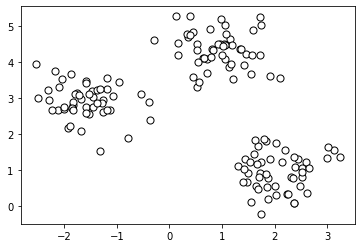

In [112]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create dataset
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)

# plot
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

In [117]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

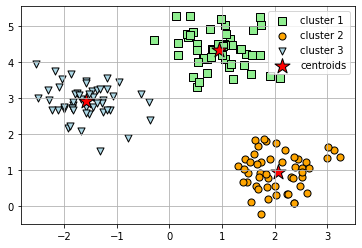

In [114]:
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### The elbow method

Elbow method is a method to find the ideal amount of clusters for ur data

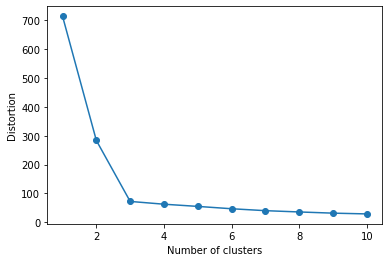

In [118]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

### Optional reading: MiniBatch Kmeans

Kmeans but with batches

### Optional reading: DBSCAN

dbscan algorithm and math

## Real-world example of how we would use this

My CS5131 assignment, includes stuff like data cleaning and dimensionality reduction which we will cover soon

## Conclusion

Take some time to digest everything learnt today, I suggest you check out on overfitting and bias. Next week we will bea learning about more stuff, probably decision trees and random forest classifier

## Exit survey

https://forms.office.com/r/y3wHy1Jhs5